Decision trees split a particular scenario into all possible cases and instruct on what to do ineach case. For example, shall I go for a walk? If it's sunny, then yes, otherwise not. So the decision tree specifies criteria that need to be met in order to proceed with an action and can make decision based on the given data (e.g. whether it's sunny). It is a type of machine learning that learn from given data and the decision made in those conditions, to find a correlation. Training data is provided to teach the system and to allow it to recognise patterns and relationships between certain criteria and the outcome. 

However, most real-life scenarios do not follow strict rules that certainly predict the outcome. There may be many decision trees taking into account various factors that may descibe how the outcome is decided. This is called random forest. It bases its outcome on the outcomes of individual decision trees. It is used for regression and classification and "bagging". Training data is provided to teach the system and to allow it to recognise patterns and relationships between certain criteria and the outcome. For example, we could carry out out Bootstrap, which involves simply training the decision trees in the random forest by random data from the dataset. Then they make predictions about new data. Taking the average of the outcomes is a reasonable conclusion to reduce bias, and this process is called aggreggation (as it "weighs out", gives a "summary" of the overall prediction).

Here is an example of a classification model using the iris dataset:

This is the dataset: 
     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]

Accuracy: 0.9333333333333333


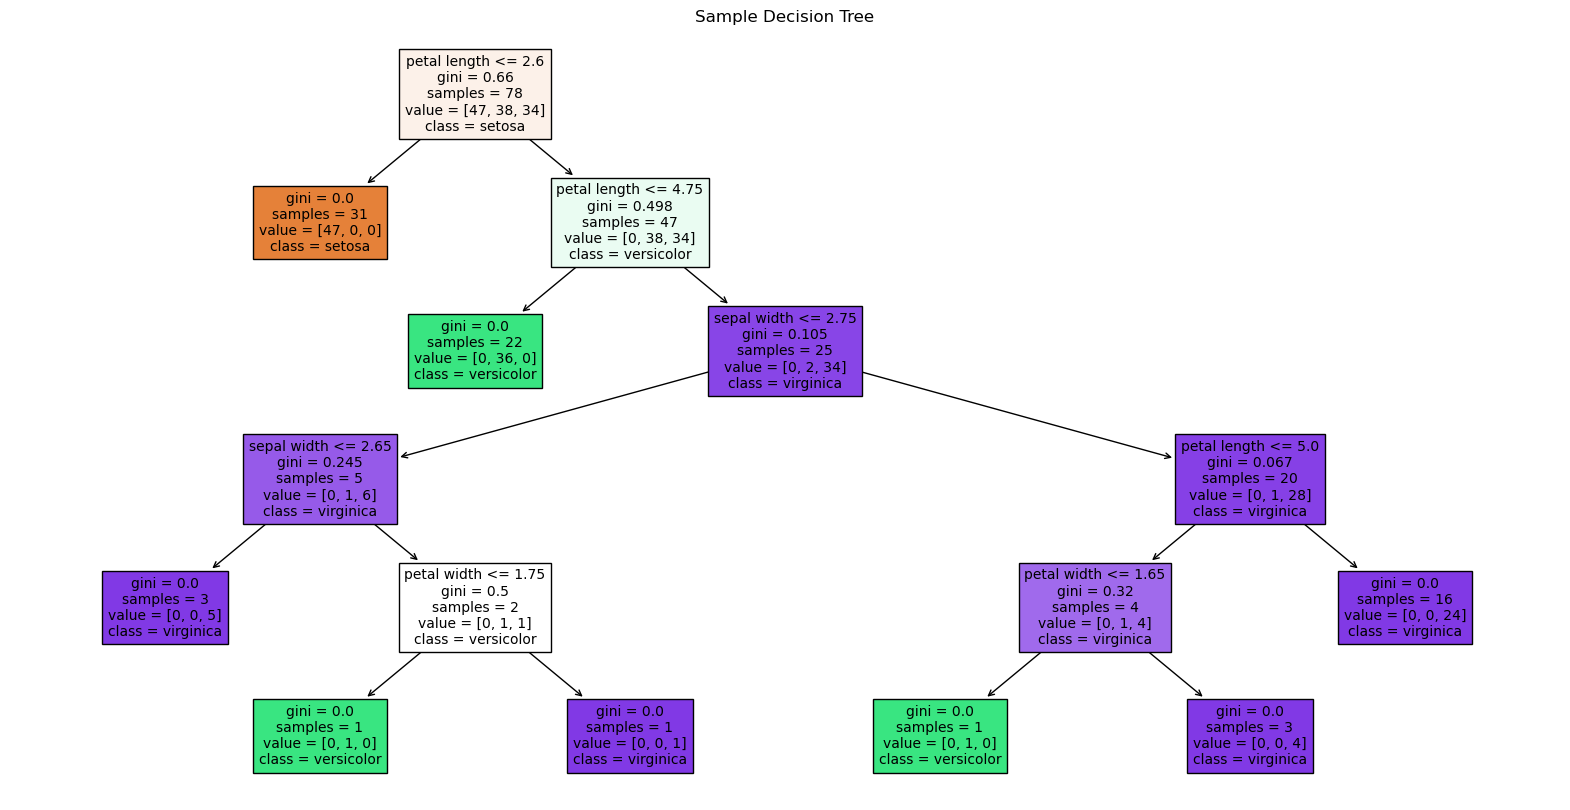

petal length    0.455047
petal width     0.429932
sepal length    0.091633
sepal width     0.023388
dtype: float64


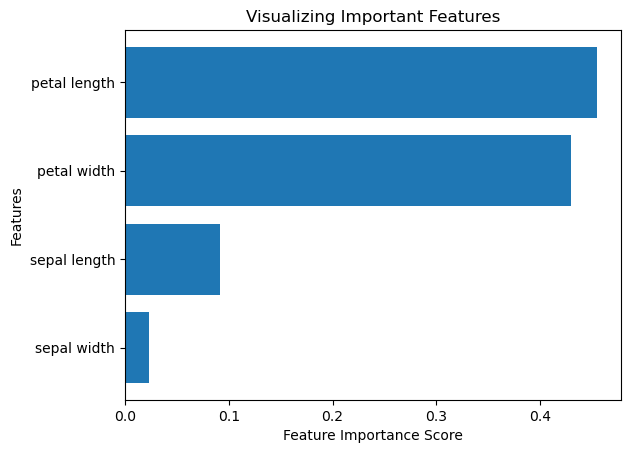

Accuracy of new model: 0.9666666666666667


In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

# seed np.random for reproducibility
np.random.seed(0)

# store and display the dataset
data = pd.read_csv('data/iris.data')
print("This is the dataset: ")
print(data)

# shuffle the data
data = data.sample(frac = 1)


# process and split the data

# store the data in a pandas dataframe
dataframe = pd.DataFrame({
    'sepal length':data.iloc[:,0],
    'sepal width':data.iloc[:,1],
    'petal length':data.iloc[:,2],
    'petal width':data.iloc[:,3],
    'species':data.iloc[:,4]
})

# order of features in dataset
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
classes = ['setosa', 'versicolor', 'virginica']

# create X and y
X=dataframe[features]  # Features
y=dataframe['species']  # Labels

# test - Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

# build the classification model
classifier = RandomForestClassifier(n_estimators=100)

# train the model
classifier.fit(X_train,y_train)

# make predictions using the model
y_pred = classifier.predict(X_test)

# accuracy of the model
print("\nAccuracy:",accuracy_score(y_test, y_pred))

# display a sample decision tree from the random forest
tree = classifier.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=classes, filled=True, fontsize=10)
plt.title("Sample Decision Tree")
plt.show()

# find how important each feature is when classifying the data
feature_imp = pd.Series(classifier.feature_importances_,index=features).sort_values(ascending=False)
print(feature_imp)

# create a bar plot displaying the information
fig, ax = plt.subplots()
ax.barh(feature_imp.index, feature_imp, align='center')

#invert y axis so most important are at the top
ax.invert_yaxis()

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# sepal length is the least important feature so remove it and create a new model
# split dataset into features and labels
dataframe2 = pd.DataFrame({
    'sepal width':data.iloc[:,1],
    'petal length':data.iloc[:,2],
    'petal width':data.iloc[:,3],
    'species':data.iloc[:,4]
})

# order of features in dataset
features = ['sepal length', 'petal length', 'petal width']

# create X and y
X=dataframe[features]  # Features
y=dataframe['species']  # Labels

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

# create a new Classifier
classifier2=RandomForestClassifier(n_estimators=100)

# train the model using the data
classifier2.fit(X_train, y_train)

# make a prediction on the test data
y_pred=classifier2.predict(X_test)

# find the accuracy of the model with the extra feature removed
print("Accuracy of new model:",accuracy_score(y_test, y_pred))

After importing the necessary libraries, the code also imports a dataset for the random forest, storing it in a variable (data) and showing how the dataset looks like. We then process that data into a dataframe and split it into features and classes, before making the train-test split. To make good predictions, the random forest neeeds to be trained to spot some patters in data and outcomes, and this is what the training data is used for. The model then needs to be tested to see how well it predicts the outcomes, and the testing data is used for this. Then some processing follows, which has to do with preparing numerical training data. Classification models can then be made, and since there is enough data we can train several models and choose the one which makes the least (and smallest) errors in its predictions. To judge how well a given model performs, we calculate the accuracy, which give a quantitative indication of how close the predicted values are to the true ones. The predictions are stored in y_pred. 

We can now see how important each feature was in classifiying the data. It is clear that sepal width does not contribute much and it is therefore safe to remove it. This makes the decision trees simpler while not compromising on accuracy. As you can see, the new model performs just as well as the old one.

Random forests have a variaty of applications, including predicting continuous numerical values such as stock prices and temperatures, as well as processing data with many dimansions, i.e. when data items have amny different characteristics (e.g. for a person: eye colour, hair colour, height etc).

Random forests have been adopted as they offer numerous advantages. Some of them are:

-It is more accurate than the decision tree algorithm (because it contains many decision trees and hence is less sensitive to extreme values).

-It is effective in handling large datasets that have many attributes. This was explained above.

-It can handle missing data, outliers, and noisy features. As explained before, because it contains many decision trees, it is easier to judge which values are extreme (outliers). As a result, the model can more easily recognise them as well as estimate the probability of them occuring, to take this into account.

They however have some limitations:

-The model can be difficult to interpret. This is because it is more complicated than a decision tree.

-It is computationally expensive. This follows from the above, as it involves more processing and computation, more computer resources are required to maintain it.